<a href="https://colab.research.google.com/github/wannabedain/school_work/blob/main/%ED%95%9C%EA%B5%AD%EB%AE%A4%EC%A7%80%EC%85%98_%EA%B4%80%EB%A0%A8_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import urllib.request as ur
import json
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

def get_color_from_partition(partition, G):
    color = dict()
    for idx in range(len(partition)):
        for node in partition[idx]:
            color[node] = idx
    node_color = [color[node] for node in G.nodes()]
    return node_color

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
query = 'https://en.wikipedia.org/w/api.php?action=parse&page=List_of_South_Korean_musicians&prop=wikitext&format=json'   
wikiresponse =  ur.urlopen(query)
wikisource = wikiresponse.read()
wikijson= json.loads(wikisource)
wikistr = str(wikijson['parse']['wikitext']['*'])
wikistr

"{{Short description|none}}\n{{More citations needed|date=August 2010}}\n\n{{dynamic list}}\nThis is a list of musical artists that are of [[South Korea]]n nationality. They may not necessarily be of full [[Koreans|Korean]] ancestry, sing in [[Korean language]], or reside in South Korea.<ref>{{cite web|title=Artist Search|url=http://world.kbs.co.kr/english/program/program_artist.htm|publisher=[[Korean Broadcasting System|KBS World]]|accessdate=27 April 2014}}</ref><ref>{{cite web|title=K-pop database with all notable artists who released albums since 1920|url=http://k-pop.or.kr|publisher=K-pop Archives|accessdate=3 May 2014|language=Korean}}, backed by [http://www.visitseoul.net/en/article/article.do?_method=view&m=0004003002005&p=03&art_id=59966&lang=en Seoul Metropolitan Government] {{webarchive|url=https://web.archive.org/web/20140503165630/http://www.visitseoul.net/en/article/article.do?_method=view&m=0004003002005&p=03&art_id=59966&lang=en |date=2014-05-03 }}</ref><ref>{{cite web|

In [ ]:
# 첫번째 타입 : [[실제페이지명|표시페이지명]] 처리
links_type1 = re.findall(r'\[\[[^\]\[\[:]+\|[^\]\[\[:]+\]\]', wikistr)
#[^\]\[\[:]+   는 [, ], : 를 제외한 문자열 의미
links_type1

['[[Koreans|Korean]]',
 '[[Korean Broadcasting System|KBS World]]',
 '[[100% (band)|100%]]',
 '[[10cm (band)|10cm]]',
 '[[24K (band)|24K]]',
 '[[2AM (band)|2AM]]',
 '[[4L (band)|4L]]',
 '[[Nine Muses (band)|Nine Muses]]',
 '[[A.C.E (South Korean band)|A.C.E]]',
 '[[Adora (singer)|Adora]]',
 '[[April (band)|APRIL]]',
 '[[A-Jax (band)|A-JAX]]',
 '[[Double-A (band)|AA]]',
 '[[AOA (group)|AOA]]',
 '[[After School (band)|After School]]',
 '[[Ali (South Korean singer)|Ali]]',
 '[[Anda (singer)|Anda]]',
 '[[Andy Lee (South Korean singer)|Andy Lee]]',
 '[[Argon (band)|Argon]]',
 '[[Arin (singer)|Arin]]',
 '[[Aron (singer)|Aron]]',
 '[[As One (musical duo)|As One]]',
 '[[Astro (South Korean band)|Astro]]',
 '[[B.A.P (South Korean band)|B.A.P]]',
 '[[B.I (rapper)|B.I]]',
 '[[B.I.G (band)|B.I.G]]',
 '[[Babylon (singer)|Babylon]]',
 '[[Bada (singer)|Bada]]',
 '[[Baekho (singer)|Baekho]]',
 '[[Battle (South Korean band)|Battle]]',
 '[[Beast (South Korean band)|Beast]]',
 '[[Bestie (band)|Bestie]]',

In [ ]:
# 첫번째 타입 : [[(실제페이지명)|(표시페이지명)]] 처리
links_type1 = re.findall(r'\[\[([^\]\[\[:]+)\|([^\]\[\[:]+)\]\]', wikistr)    #[^\]\[\[:]+   는 [, ], : 를 제외한 문자열 의미
links_type1  = links_type1[2:]   # 처음2개는 한국 뮤지션이 아니므로 제외
links_type1

[('100% (band)', '100%'),
 ('10cm (band)', '10cm'),
 ('24K (band)', '24K'),
 ('2AM (band)', '2AM'),
 ('4L (band)', '4L'),
 ('Nine Muses (band)', 'Nine Muses'),
 ('A.C.E (South Korean band)', 'A.C.E'),
 ('Adora (singer)', 'Adora'),
 ('April (band)', 'APRIL'),
 ('A-Jax (band)', 'A-JAX'),
 ('Double-A (band)', 'AA'),
 ('AOA (group)', 'AOA'),
 ('After School (band)', 'After School'),
 ('Ali (South Korean singer)', 'Ali'),
 ('Anda (singer)', 'Anda'),
 ('Andy Lee (South Korean singer)', 'Andy Lee'),
 ('Argon (band)', 'Argon'),
 ('Arin (singer)', 'Arin'),
 ('Aron (singer)', 'Aron'),
 ('As One (musical duo)', 'As One'),
 ('Astro (South Korean band)', 'Astro'),
 ('B.A.P (South Korean band)', 'B.A.P'),
 ('B.I (rapper)', 'B.I'),
 ('B.I.G (band)', 'B.I.G'),
 ('Babylon (singer)', 'Babylon'),
 ('Bada (singer)', 'Bada'),
 ('Baekho (singer)', 'Baekho'),
 ('Battle (South Korean band)', 'Battle'),
 ('Beast (South Korean band)', 'Beast'),
 ('Bestie (band)', 'Bestie'),
 ('Big Bang (South Korean band)', 'Bi

In [ ]:
# 두번째타입 : [[페이지명]] 처리
links_type2 = re.findall(r'\[\[([^\]\[\[:\|]+)\]\]', wikistr)     #[^\]\[\[:]+   는 [, ], : 를 제외한 문자열 의미
links_type2  = links_type2[2:-5]   # 처음2개와 마지막 5개는 한국뮤지션이 아니므로 제외
links_type2

['15&',
 '1TYM',
 '2NB',
 '2NE1',
 '2NISE',
 '2PM',
 '2000 Won',
 '4Minute',
 '4Ten',
 '5dolls',
 '5tion',
 '5urprise',
 '5Zic',
 '8Eight',
 'A.cian',
 'AB6IX',
 'Aespa',
 'Apink',
 'Apeace',
 'Ahn Eak-tai',
 'Ahn Jae-wook',
 'Ailee',
 'Ajoo',
 'AKMU',
 'Almeng',
 'AlphaBat',
 'An Yu-jin',
 'Ariaz',
 'AleXa',
 'Ateez',
 'Aziatix',
 'B1A4',
 'Baby Vox',
 'Baby Vox Re.V',
 'Badkiz',
 'Bang Ye-dam',
 'B-Bomb',
 'Bae Ho',
 'Bae Jin-young',
 'Bae Seul-ki',
 'Bae Suzy',
 'Baek A-yeon',
 'Baekhyun',
 'Baek Ji-young',
 'Baek Ye-rin',
 'Bang Min-ah',
 'Bang Yong-guk',
 'Basick',
 'Be.A',
 'Beenzino',
 'Bernard Park',
 'Berry Good',
 'Bewhy',
 'Bigflo',
 'Big Mama King',
 'Bizniz',
 'Bizzy',
 'Black Beat',
 'Black Nut',
 'Blady',
 'Blackpink',
 'Block B',
 'BoA',
 'Bob Girls',
 'Bobby Kim',
 'Boohwal',
 'Boys24',
 'Brave Brothers',
 'Brave Girls',
 'Brian Joo',
 'Broken Valentine',
 'Brown Eyed Girls',
 'BTS',
 'BtoB 4U',
 'BtoB Blue',
 'Bulldog Mansion',
 'Bvndit',
 'Byul',
 'C-Clown',
 'CB Mas

In [ ]:
# 첫번째 타입과 두번째 타입으로부터 노드(한국뮤지션) 목록 생성
# 첫번째 타입은 두 개 중 앞에꺼를 가져와야 실행이 됨.
# 두번째 타입은 그냥 노드 이름이니깐 가져와도 됨
# 집합으로 만든 후, 리스트로 바꾸기 : 집합은 중복을 허락하지 않음. 중복 제거

list(set([x[0] for x in links_type1] + links_type2))

['JeA',
 'Sunny (singer)',
 'Park Ji-min (singer, born 1997)',
 'Kim Sung-kyu',
 'Kim Hyo-yeon',
 'Kim Sung-jae',
 'Shin Hae-chul',
 'Rumble Fish (singer)',
 'Shu-I',
 'SM the Ballad',
 'Nasty Nasty (band)',
 'Park Soo-ah',
 'Kard (group)',
 'HeartB',
 'Tablo',
 'Chungha',
 'Zelo',
 'Winner (band)',
 'Hyun Bin',
 'Nicole Jung',
 'Kangnam (singer)',
 'Ateez',
 'Kim Yeon-ji',
 'Two X',
 'K-Much',
 'Day6',
 'Crown J',
 'Got7',
 'Wings (duo)',
 'Shinhwa',
 'Samuel Seo',
 'Weki Meki',
 'Kangin',
 'The Rose (band)',
 'Kim Kwang-seok',
 'NCT 127',
 'Han Terra',
 'Woozi',
 'Sugar (South Korean band)',
 'IZ (band)',
 'Lee Min-woo',
 'Goofy (band)',
 'Speed (South Korean band)',
 'Ha Sung-woon',
 'DJ Doc',
 'Mighty Mouth',
 'Jung Yong-hwa',
 'Enhypen',
 'Lady Jane (singer)',
 'Gaeko',
 'Heize',
 'Tim (singer)',
 'Jang Dae-hyeon',
 'Nam Woo-hyun',
 'Loona',
 'Sunny Hill',
 'Tony Ahn',
 'Apeace',
 'Super Junior',
 'Chocolat (band)',
 'Galaxy Express (South Korean band)',
 'Jung Eun-ji',
 'Tasty (b

In [ ]:
nodes = list(set([x[0] for x in links_type1] + links_type2))

In [ ]:
###네트워크만들기
edges = list()

for node in nodes:
    try:
        query = 'https://en.wikipedia.org/w/api.php?action=parse&page=' + node.replace(" ", "_") +'&prop=wikitext&format=json'
        wikiresponse = ur.urlopen(query)
        wikisource = wikiresponse.read()
        wikijson = json.loads(wikisource)
        wikistr = str(wikijson['parse']['wikitext']['*'].encode('utf-8'))

        links_type1 = re.findall(r'\[\[([^\]\[:]+)\|([^\]\[:]+)\]\]', wikistr)
        links_type2 = re.findall(r'\[\[([^\]\[:\|]+)\]\]', wikistr) 
        links = list(set([x[0] for x in links_type1] + links_type2))

        for link in links:
            if link in nodes and link != node:
                print('%s -> %s' % (node, link))
                edges.append((node, link))
                
    except Exception as e:
        print("Error occured at", node, e)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Cho Kyu-hyun -> Siwon
Cho Kyu-hyun -> Leeteuk
Cho Kyu-hyun -> Changmin
Cho Kyu-hyun -> Park Hyo-shin
Cho Kyu-hyun -> Lee Hi
Cho Kyu-hyun -> CNBLUE
Cho Kyu-hyun -> Taeyeon
Cho Kyu-hyun -> Lee Seung-hwan
Cho Kyu-hyun -> The Grace (band)
Cho Kyu-hyun -> Kim Jong-hyun (singer)
Cho Kyu-hyun -> Shindong
Cho Kyu-hyun -> Super Junior-K.R.Y.
Cho Kyu-hyun -> Lee Tae-min
Cho Kyu-hyun -> Lee Donghae
Cho Kyu-hyun -> Pentagon (South Korean band)
Cho Kyu-hyun -> Yesung
Cho Kyu-hyun -> Beast (South Korean band)
Cho Kyu-hyun -> Infinite (band)
Cho Kyu-hyun -> Kim Jeong-hoon
Cho Kyu-hyun -> Kim Hee-chul
Hanhae -> Leo (singer)
Hanhae -> Lady Jane (singer)
Hanhae -> Gaeko
Hanhae -> Yoon Jong-shin
Hanhae -> KittiB
Hanhae -> Jung Eun-ji
Hanhae -> Verbal Jint
Hanhae -> Cheetah (rapper)
Hanhae -> Hoya (singer)
Hanhae -> Lyn (singer)
Hanhae -> Hani (singer)
Hanhae -> Key (entertainer)
Hanhae -> Raina (singer)
Hanhae -> San E
Hanhae -> Jessi (musician)
Hanhae -> Dynamic Duo (

In [ ]:
edges

[('JeA', 'Moonbyul'),
 ('JeA', 'B1A4'),
 ('JeA', 'Sunny Hill'),
 ('JeA', 'Gain (singer)'),
 ('JeA', 'Oh Ha-young'),
 ('JeA', 'Brown Eyed Soul (band)'),
 ('JeA', 'Jo Kwon'),
 ('JeA', 'Ailee'),
 ('JeA', 'Laboum'),
 ('JeA', 'Cheetah (rapper)'),
 ('JeA', 'Kim Yeon-ji'),
 ('JeA', 'Cho PD'),
 ('JeA', 'Miryo'),
 ('JeA', 'MC Mong'),
 ('JeA', 'MBLAQ'),
 ('JeA', 'Brown Eyed Girls'),
 ('JeA', 'Narsha'),
 ('JeA', 'Seo Eun-kwang'),
 ('Sunny (singer)', 'Kim Hyo-yeon'),
 ('Sunny (singer)', 'Brown Eyed Girls'),
 ('Sunny (singer)', 'Sungmin'),
 ('Sunny (singer)', 'Kim Hyung-jun'),
 ('Sunny (singer)', 'Super Junior'),
 ('Sunny (singer)', 'Miryo'),
 ('Sunny (singer)', 'SS501'),
 ('Sunny (singer)', 'Iconiq'),
 ('Sunny (singer)', 'Luna (singer)'),
 ('Sunny (singer)', 'f(x) (band)'),
 ('Sunny (singer)', '2AM (band)'),
 ('Sunny (singer)', 'Lee Tae-yong'),
 ('Kim Sung-kyu', 'Ailee'),
 ('Kim Sung-kyu', 'Nell (band)'),
 ('Kim Sung-kyu', 'TVXQ'),
 ('Kim Sung-kyu', 'L (South Korean singer)'),
 ('Kim Sung-kyu', 'P

생성 유향 네트워크; 노드 수: 855, 엣지 수: 5892


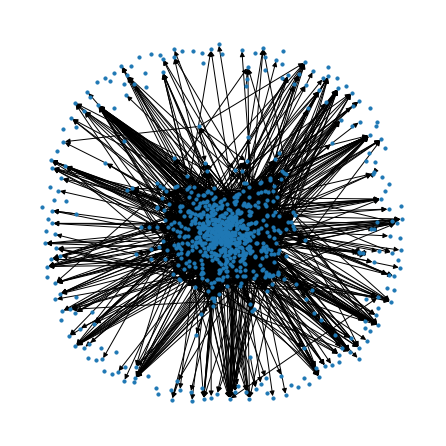

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
print("생성 유향 네트워크; 노드 수: %d, 엣지 수: %d" %(G.number_of_nodes(), G.number_of_edges()))
fig = plt.figure(figsize=(6,6))          # 그림 크기 설정
nx.draw_spring(G, node_size=10)
plt.show()

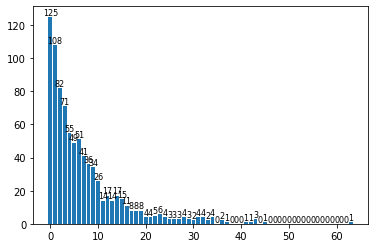

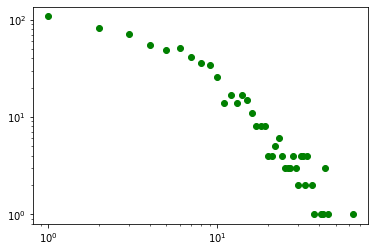

In [ ]:
### 차수 분포
# 유향 네트워크이므로 내차수와 외차수 분포를 그림


in_degrees = list(dict(G.in_degree()).values())   # 내차수값들
x = range(0,max(in_degrees)+1)
in_degree_freq = [in_degrees.count(i) for i in x]
bar = plt.bar(x, in_degree_freq)           # Bar Plot
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 8)
plt.show()

plt.show()
plt.loglog(x[1:], in_degree_freq[1:], 'go')      # log-log plot
plt.show()


In [ ]:
# 내차수 값들의 top 3 index
sorted(range(len(in_degrees)), key=lambda i: in_degrees[i])[-3:]

[595, 345, 58]

In [ ]:
in_degrees[58]

63

In [ ]:
in_degrees[345]

45

In [ ]:
in_degrees[595]

43

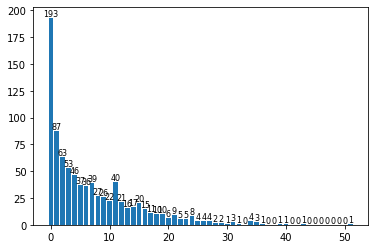

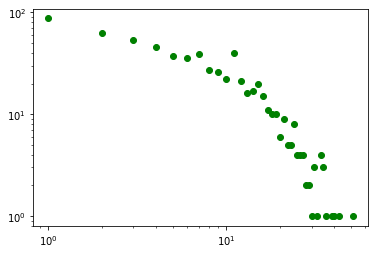

In [ ]:
out_degrees = list(dict(G.out_degree()).values())   # 외차수값들
x = range(0,max(out_degrees)+1)
out_degree_freq = [out_degrees.count(i) for i in x]
bar = plt.bar(x, out_degree_freq)           # Bar Plot
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 8)
plt.show()

plt.loglog(x[1:], out_degree_freq[1:], 'go')      # log-log plot
plt.show()

In [ ]:
# 외차수 값들의 top 3 index
sorted(range(len(out_degrees)), key=lambda i: out_degrees[i])[-3:]

[592, 712, 83]

In [ ]:
out_degrees[83]

51

In [ ]:
out_degrees[712]

43

In [ ]:
out_degrees[592]

40

In [ ]:
# 노드 중심성 
indeg_centrality = nx.in_degree_centrality(G)
outdeg_centrality = nx.out_degree_centrality(G)
betw_centrality = nx.betweenness_centrality(G)
top5 = sorted(indeg_centrality.items(), key=lambda item: item[1], reverse=True)[0:5]
print("Indegree Centrality Top 5\n", top5)
top5 = sorted(outdeg_centrality.items(), key=lambda item: item[1], reverse=True)[0:5]
print("Outdegree Centrality Top 5\n", top5)
top5 = sorted(betw_centrality.items(), key=lambda item: item[1], reverse=True)[0:5]
print("Betweenness Centrality Top 5\n", top5)

Indegree Centrality Top 5
 [('Super Junior', 0.07377049180327869), ('Jay Park', 0.05269320843091335), ('TVXQ', 0.05035128805620609), ('Shinee', 0.05035128805620609), ('BoA', 0.05035128805620609)]
Outdegree Centrality Top 5
 [('Brave Brothers', 0.059718969555035126), ('Verbal Jint', 0.05035128805620609), ('Crush (singer)', 0.046838407494145196), ('Mino (rapper)', 0.04566744730679157), ('Zico (rapper)', 0.04215456674473068)]
Betweenness Centrality Top 5
 [('Zico (rapper)', 0.03131233185473746), ('BoA', 0.030245267399354344), ('IU (singer)', 0.029124960531714504), ('Brave Brothers', 0.025207992439006684), ('I.O.I', 0.02296871255430289)]


In [ ]:
## 
largest = max(nx.weakly_connected_components(G), key = len) # 노드들만 가져오고
G_largest = G.subgraph(largest) # 일부만 가져와라 
print("최대 연결 부분 네트워크; 노드 수: %d, 엣지 수: %d" %(G_largest.number_of_nodes(), G_largest.number_of_edges()))

최대 연결 부분 네트워크; 노드 수: 768, 엣지 수: 5886


커뮤니티 개수: 11
커뮤니티의 구성원 수: [209, 179, 172, 117, 51, 20, 7, 5, 4, 2, 2]


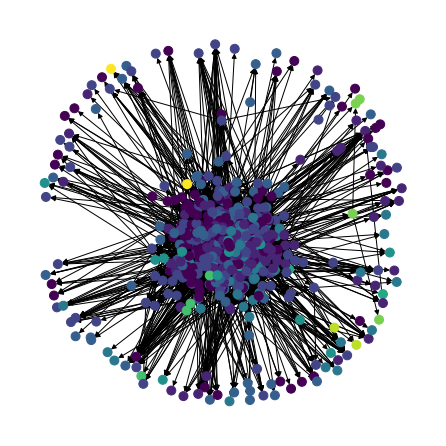

In [ ]:
G_largest_undirected = G_largest.to_undirected()    # 유향 네트워크를 무향 네트워크로 변환  .to_undirected()
partition = list(community.greedy_modularity_communities(G_largest_undirected))  #모듈러리티 기반 탐지네트워크 기법
print("커뮤니티 개수:", len(partition))
print("커뮤니티의 구성원 수:", [len(x) for x in partition])
fig = plt.figure(figsize=(6,6))                     # 그림 크기 설정
nx.draw_spring(G_largest, node_size=80, node_color=get_color_from_partition(partition, G_largest_undirected)) # spring은 있든 없는 상관x. 그저 그림그리는 방법 중 하나
plt.show()

Community #0


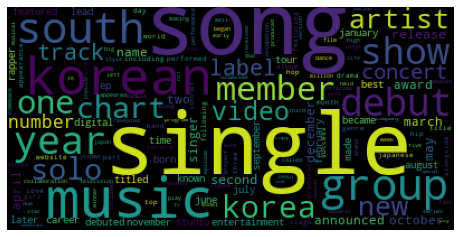

Community #1


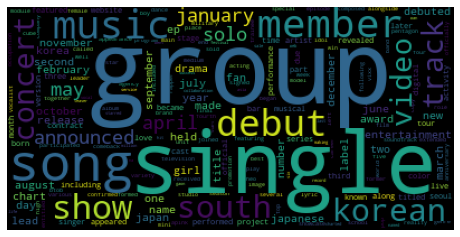

Community #2


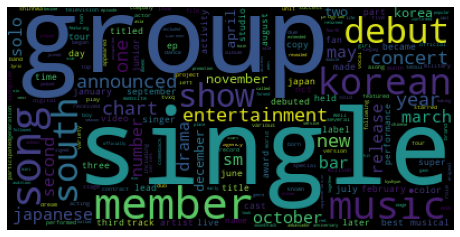

Community #3


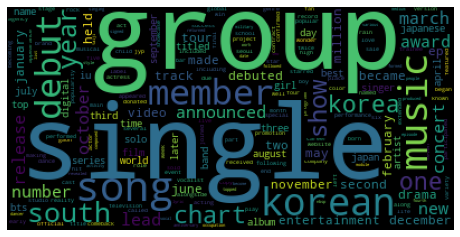

Community #4


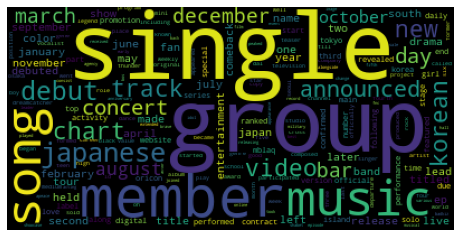

Community #5


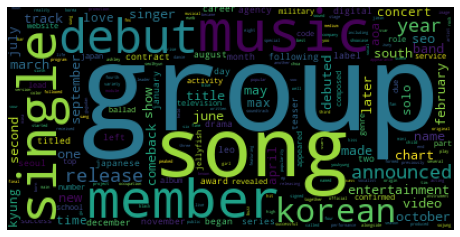

Community #6


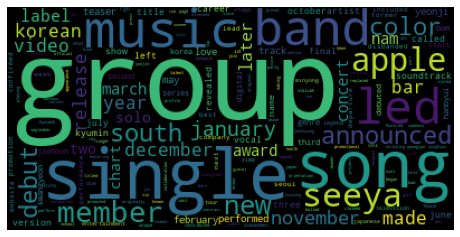

Community #7


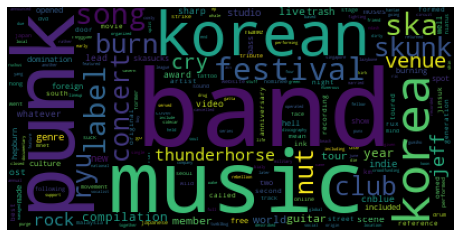

Community #8


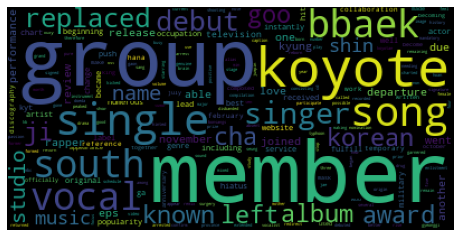

Community #9


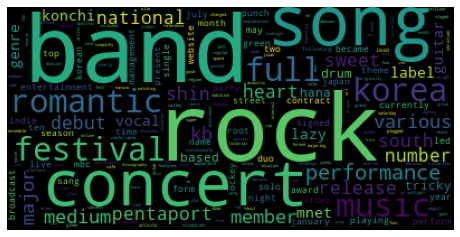

Community #10


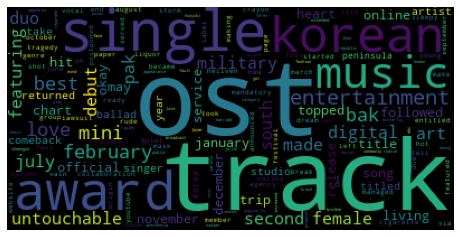

In [ ]:
for i in range(len(partition)):
    print("Community #%d" %i)
    text = ""
    for node in partition[i]:
        query = 'https://en.wikipedia.org/w/api.php?action=parse&page=' + node.replace(" ", "_") +'&prop=wikitext&format=json'
        wikiresponse = ur.urlopen(query)
        wikisource = wikiresponse.read()
        wikijson = json.loads(wikisource)
        wikistr = str(wikijson['parse']['wikitext']['*'].encode('utf-8'))
        wikistr = re.sub("<ref>.*?</ref>", " ", wikistr)   # <ref>와 </ref> 사이 문자 제거 (reference 파트 제거)
        wikistr = re.sub("{\|.*?\|}", " ", wikistr)        # 표 제거
        wikistr = re.sub("[\[{<].*?[\]}>]", " ", wikistr)  # [] {} <> 안에 문자 제거
        text += wikistr

    stopwords_en = stopwords.words('english')
    lemmatizer = nltk.stem.WordNetLemmatizer() 
    irrelevant = ["kim", "lee", "park", "choi", "jung", "kang", "cho", "jo", "yoon", "jang", "lim", "album", "released", "first"]   # 중요하지 않은 단어들       

    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords_en + irrelevant]    # 불용어와 중요하지 않은 단어들 제거
    tokens = [lemmatizer.lemmatize(t) for t in tokens]                    # 표제어 추출
    tokens = [t for t in tokens if re.fullmatch('[a-z]{2,}', t)]

    wc = WordCloud(collocations=False).generate(' '.join(tokens))     
    fig = plt.figure(figsize=(8,8))                 # 그림 크기 설정
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

19번 커뮤니티 구성원: ['Rolling Quartz', 'M.Pire', 'Cross Gene', 'Lee Hong-gi', 'Click-B', 'g.o.d (South Korean band)', "Girl's Day", 'Bang Min-ah', 'U-KISS', 'Apeace', 'UNB (group)', 'Jun.Q', 'The Boss (band)', 'F.T. Island', 'AleXa', 'Madtown', 'Laboum', 'High4', 'N.Flying', 'Onewe', 'Wassup (band)', 'Teen Top', 'Two X', 'Uni.T', 'Badkiz', 'NS Yoon-G', 'Berry Good', 'Myname', 'NC.A', 'A.cian', 'Supernova (South Korean band)', 'SF9', 'Dal Shabet', 'MBLAQ', 'Brave Girls', 'Rowoon', 'Kang Chan-hee', 'Sonamoo', 'Lee Min-ho (actor, born 1987)', 'F.Cuz', 'Lee Jun-young (entertainer)', 'Global Icon (band)', 'Ahn Daniel', 'Juniel', 'Dreamcatcher (group)', 'Kim Da-hyun', 'TXT (band)', 'Thunder (singer)', 'DIA (group)', 'Oneus', 'A.C.E (South Korean band)']


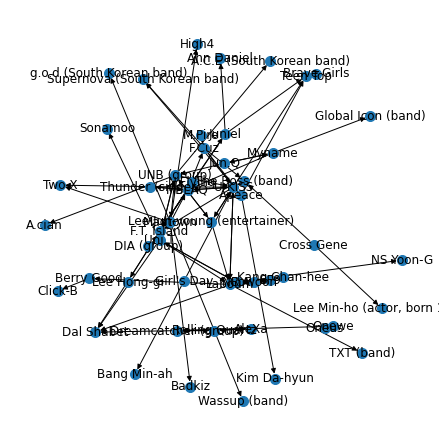

In [ ]:
print("4번 커뮤니티 구성원:", list(partition[4]))
community = G.subgraph(list(partition[4]))         # 4번 커뮤니티의 노드들만 가지고 subgraph 구성 -> 커뮤니티에 저장
fig = plt.figure(figsize=(6,6))                     # 그림 크기 설정
nx.draw(community, with_labels=True, node_size=100)
plt.show()